# Step 1 - Importing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
# On my laptop, I'm not using all the data sample, just the first two .csv files

chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)

# chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines = False)

C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
chicago_df_1.shape

(1872343, 23)

In [4]:
chicago_df_2.shape

(2688710, 23)

In [5]:
# chicago_df_3.shape

In [6]:
# chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3])
# chicago_df = chicago_df_1
chicago_df = pd.concat([chicago_df_1, chicago_df_2])

In [7]:
chicago_df.shape

(4561053, 23)

# Spet 2 - Explore the Dataset

In [8]:
chicago_df.head(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [9]:
chicago_df.tail(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
2688705,6252024,4780,HP610973,10/06/2008 12:01:00 AM,103XX S AVENUE M,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,...,10.0,52.0,01A,1201500.0,1837062.0,2008,08/17/2015 03:03:40 PM,41.707648,-87.537704,"(41.707647633, -87.537704247)"
2688706,6252483,4781,HP610973,10/06/2008 12:01:00 AM,103XX S AVENUE M,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,...,10.0,52.0,01A,1201500.0,1837062.0,2008,08/17/2015 03:03:40 PM,41.707648,-87.537704,"(41.707647633, -87.537704247)"
2688707,6253072,4782,HP610960,10/05/2008 10:32:00 PM,071XX S WOODLAWN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,CTA BUS,True,...,5.0,69.0,01A,1185444.0,1858072.0,2008,08/17/2015 03:03:40 PM,41.765693,-87.595842,"(41.765693367, -87.595841543)"
2688708,6253576,4783,HP610516,10/06/2008 05:20:00 PM,015XX S CHRISTIANA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,29.0,01A,1154284.0,1892229.0,2008,08/17/2015 03:03:40 PM,41.860101,-87.709144,"(41.86010116, -87.709144383)"
2688709,6254077,4784,HP612847,10/06/2008 11:00:00 PM,067XX S PARNELL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,...,6.0,68.0,01A,1173732.0,1860227.0,2008,08/17/2015 03:03:40 PM,41.771874,-87.638706,"(41.771874483, -87.638705836)"


In [10]:
# Just impossible on my laptop to visualize this amount of data

# plt.figure(figsize = (10, 10))
# sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [11]:
chicago_df.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude', 'Longitude'], inplace = True, axis = 1)

In [12]:
chicago_df.head(10)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
5,03/30/2006 10:30:00 PM,014XX W 73RD PL,ASSAULT,SIMPLE,APARTMENT,True,False
6,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False
7,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,THEFT,$500 AND UNDER,STREET,False,False
8,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False
9,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [13]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format = '%m/%d/%Y %I:%M:%S %p')

In [14]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [15]:
chicago_df.head(5)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [16]:
chicago_df['Primary Type'].value_counts()

THEFT                               915651
BATTERY                             815478
CRIMINAL DAMAGE                     547247
NARCOTICS                           539591
BURGLARY                            285659
OTHER OFFENSE                       280295
ASSAULT                             268955
MOTOR VEHICLE THEFT                 210486
ROBBERY                             172154
DECEPTIVE PRACTICE                  149685
CRIMINAL TRESPASS                   134684
PROSTITUTION                         53102
WEAPONS VIOLATION                    43102
PUBLIC PEACE VIOLATION               35281
OFFENSE INVOLVING CHILDREN           28862
CRIM SEXUAL ASSAULT                  15966
SEX OFFENSE                          15287
GAMBLING                             12543
LIQUOR LAW VIOLATION                 10176
INTERFERENCE WITH PUBLIC OFFICER      7814
ARSON                                 7052
KIDNAPPING                            3635
HOMICIDE                              3230
INTIMIDATIO

In [17]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         915651
BATTERY                       815478
CRIMINAL DAMAGE               547247
NARCOTICS                     539591
BURGLARY                      285659
OTHER OFFENSE                 280295
ASSAULT                       268955
MOTOR VEHICLE THEFT           210486
ROBBERY                       172154
DECEPTIVE PRACTICE            149685
CRIMINAL TRESPASS             134684
PROSTITUTION                   53102
WEAPONS VIOLATION              43102
PUBLIC PEACE VIOLATION         35281
OFFENSE INVOLVING CHILDREN     28862
Name: Primary Type, dtype: int64

In [18]:
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

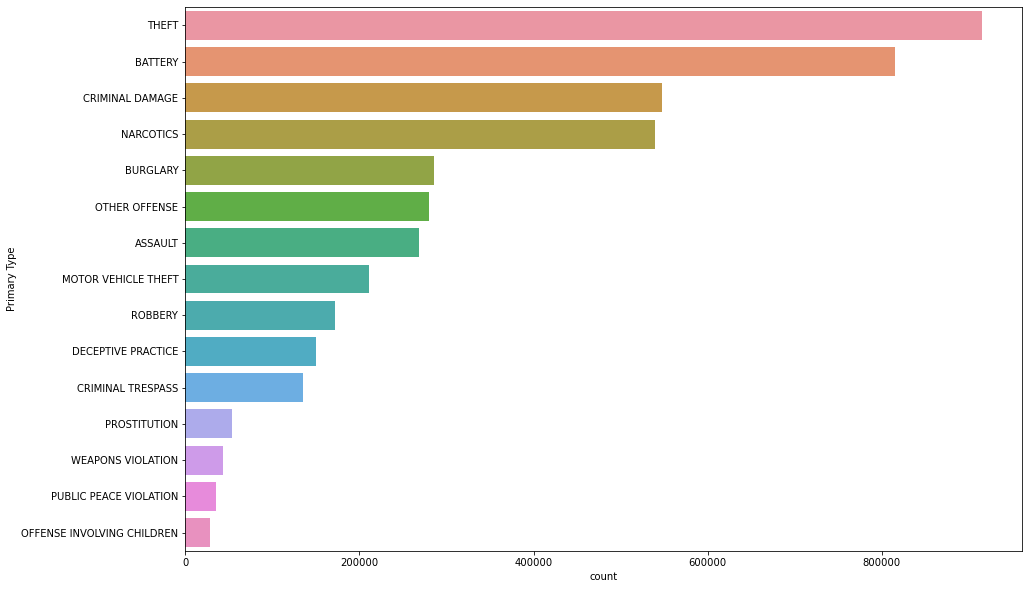

In [19]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'Primary Type', 
              data = chicago_df, 
              order = order_data)

<AxesSubplot:xlabel='count', ylabel='Location Description'>

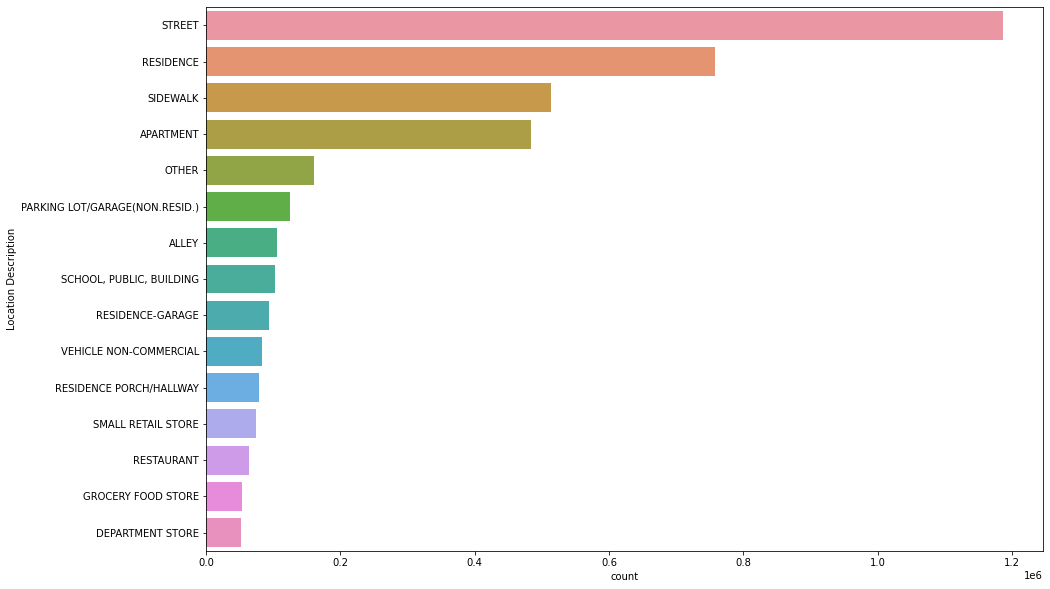

In [20]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'Location Description', 
              data = chicago_df, 
              order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [21]:
chicago_df.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

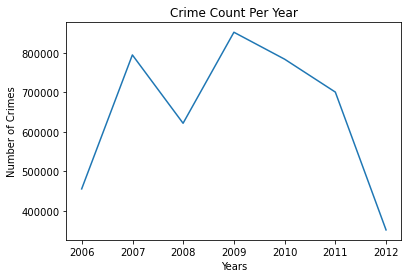

In [22]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

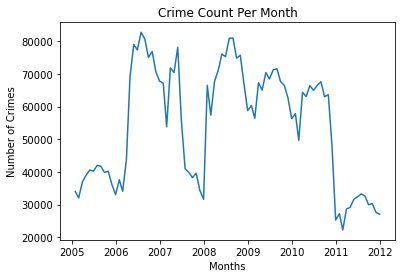

In [23]:
plt.plot(chicago_df.resample('M').size())
plt.title('Crime Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

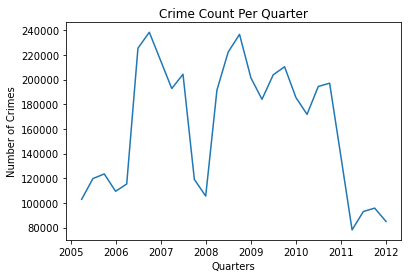

In [24]:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

# Step 3 - Prepare the Data

In [25]:
# Preparing the data to be used by Facebook API, Prophet

chicago_prophet = chicago_df.resample('M').size().reset_index()

In [26]:
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
79,2011-08-31,32616
80,2011-09-30,29945
81,2011-10-31,30305
82,2011-11-30,27653


In [27]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [28]:
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
79,2011-08-31,32616
80,2011-09-30,29945
81,2011-10-31,30305
82,2011-11-30,27653


In [29]:
chicago_prophet_df_final = chicago_prophet.rename(columns = {'Date': 'ds', 'Crime Count': 'y'})

In [30]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
79,2011-08-31,32616
80,2011-09-30,29945
81,2011-10-31,30305
82,2011-11-30,27653


# Step 4 - Make Predictions

In [31]:
# Here we are using the Prophet

m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future = m.make_future_dataframe(periods = 730)
forecast = m.predict(future)

In [33]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,56414.588467,22147.353286,58371.153008,56414.588467,56414.588467,-16054.256474,-16054.256474,-16054.256474,-16054.256474,-16054.256474,-16054.256474,0.0,0.0,0.0,40360.331993
1,2005-02-28,56535.514505,24277.560901,61735.793059,56535.514505,56535.514505,-12094.858538,-12094.858538,-12094.858538,-12094.858538,-12094.858538,-12094.858538,0.0,0.0,0.0,44440.655967
2,2005-03-31,56669.396905,36143.464518,73901.386042,56669.396905,56669.396905,-2215.718202,-2215.718202,-2215.718202,-2215.718202,-2215.718202,-2215.718202,0.0,0.0,0.0,54453.678703
3,2005-04-30,56798.960517,39187.185842,76211.240447,56798.960517,56798.960517,697.311692,697.311692,697.311692,697.311692,697.311692,697.311692,0.0,0.0,0.0,57496.272209
4,2005-05-31,56932.842918,42837.137725,78223.595082,56932.842918,56932.842918,4041.831200,4041.831200,4041.831200,4041.831200,4041.831200,4041.831200,0.0,0.0,0.0,60974.674118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,2013-12-26,40121.647161,-22094.879816,15164.023145,38904.425170,41357.313845,-43313.764579,-43313.764579,-43313.764579,-43313.764579,-43313.764579,-43313.764579,0.0,0.0,0.0,-3192.117418
810,2013-12-27,40109.851699,-19386.830369,18589.999710,38890.366438,41348.638153,-40487.759888,-40487.759888,-40487.759888,-40487.759888,-40487.759888,-40487.759888,0.0,0.0,0.0,-377.908189
811,2013-12-28,40098.056237,-14179.746952,23508.593630,38876.200209,41339.626837,-35999.536493,-35999.536493,-35999.536493,-35999.536493,-35999.536493,-35999.536493,0.0,0.0,0.0,4098.519744
812,2013-12-29,40086.260776,-8100.942418,30166.280360,38862.033981,41328.941962,-29808.785735,-29808.785735,-29808.785735,-29808.785735,-29808.785735,-29808.785735,0.0,0.0,0.0,10277.475040


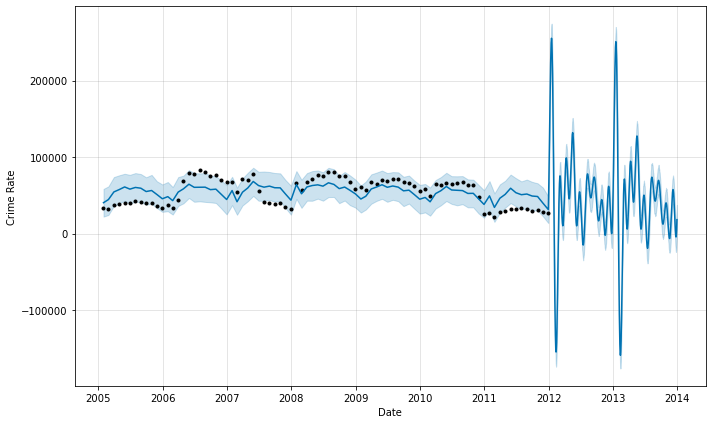

In [34]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Crime Rate')

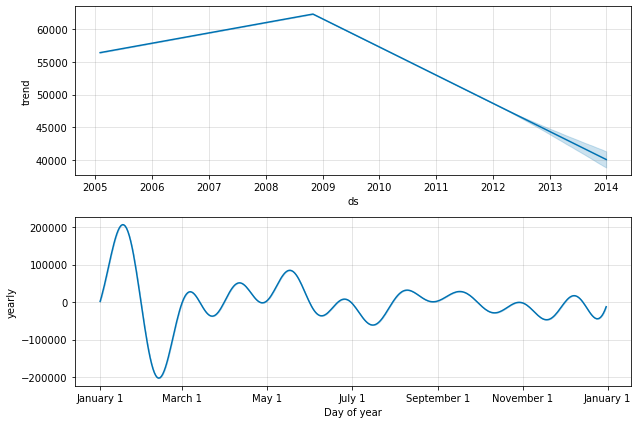

In [35]:
figure = m.plot_components(forecast)